In [1]:
import numpy as np

from src.tensor import Tensor
from src.activation_function import Linear, ReLU, Sigmoid, Softmax
from src.loss_function import MeanSquaredError
from src.layer import Dense
from src.model import FFNN
from src.weight_initializer import GlorotUniformInitializer

### **Tensor Test Case**

In [2]:
# Basic operations
a = Tensor(np.array([1,2]))
b = Tensor(np.array([3,4]))
c = a + b
d = a - b
e = a * b
f = a / b

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [3. 4.], Gradient: [0. 0.], Op: None
Value: [4. 6.], Gradient: [0. 0.], Op: +
Value: [-2. -2.], Gradient: [0. 0.], Op: +
Value: [3. 8.], Gradient: [0. 0.], Op: *
Value: [0.33333333 0.5       ], Gradient: [0. 0.], Op: *


In [3]:
# Activation function and loss function
a = Tensor(np.array([1,2]))
b = a.compute_activation(Linear)
c = a.compute_activation(ReLU)
d = b.compute_loss(Tensor(np.array([3,4])), MeanSquaredError)
e = c.compute_loss(Tensor(np.array([3,4])), MeanSquaredError)

print(a)
print(b)
print(c)
print(d)
print(e)

Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [1. 2.], Gradient: [0. 0.], Op: Linear
Value: [1. 2.], Gradient: [0. 0.], Op: ReLU
Value: [4.], Gradient: [0.], Op: MeanSquaredError
Value: [4.], Gradient: [0.], Op: MeanSquaredError


In [4]:
# Automatic differentiation
a = Tensor(np.array([1,2]))
b = Tensor(np.array([3,4]))
c = a + b
d = a - b
e = c * d
f = e.compute_activation(Linear)
g = e.compute_activation(ReLU)
h = f.compute_loss(np.array([1,1]), MeanSquaredError)
i = g.compute_loss(np.array([1,1]), MeanSquaredError)

print("---------- Before backpropagation ----------")
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)

h.backward()
i.backward()

print("\n---------- After backpropagation ----------")
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)

---------- Before backpropagation ----------
Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [3. 4.], Gradient: [0. 0.], Op: None
Value: [4. 6.], Gradient: [0. 0.], Op: +
Value: [-2. -2.], Gradient: [0. 0.], Op: +
Value: [ -8. -12.], Gradient: [0. 0.], Op: *
Value: [ -8. -12.], Gradient: [0. 0.], Op: Linear
Value: [0. 0.], Gradient: [0. 0.], Op: ReLU
Value: [125.], Gradient: [0.], Op: MeanSquaredError
Value: [1.], Gradient: [0.], Op: MeanSquaredError

---------- After backpropagation ----------
Value: [1. 2.], Gradient: [-108. -312.], Op: None
Value: [3. 4.], Gradient: [108. 156.], Op: None
Value: [4. 6.], Gradient: [ 72. 104.], Op: +
Value: [-2. -2.], Gradient: [-144. -312.], Op: +
Value: [ -8. -12.], Gradient: [-18. -26.], Op: *
Value: [ -8. -12.], Gradient: [-18. -26.], Op: Linear
Value: [0. 0.], Gradient: [-2. -2.], Op: ReLU
Value: [125.], Gradient: [1.], Op: MeanSquaredError
Value: [1.], Gradient: [1.], Op: MeanSquaredError


In [5]:
## Simulation of one layer with two neurons (h1 and h2)

# Initial values
x = Tensor(np.array([1, 2, 3]), tensor_type="input")            # input, x[0] is always 1
y = np.array([16, 14])                                          # correct class / y_true
wh1 = Tensor(np.array([2, 3, 4]), tensor_type="weight")         # weights of neuron h1, wh1[0] = b1 (bias)
wh2 = Tensor(np.array([3, 4, 5]), tensor_type="weight")         # weights of neuron h2, wh2[0] = b2 (bias)

# Calculate net
wh1_x = wh1 * x
wh2_x = wh2 * x
net1 = wh1_x.sum()
net2 = wh2_x.sum()

# Calculate output
o1 = net1.compute_activation(ReLU)
o2 = net2.compute_activation(ReLU)

# Calculate loss
output = o1.concat([o2])
loss = output.compute_loss(y, MeanSquaredError)

print("---------- Before backpropagation ----------")
print(wh1)
print(wh2)
print(wh1_x)
print(wh2_x)
print(net1)
print(net2)
print(o1)
print(o2)
print(output)
print(loss)

# Initiate automated differentiation
loss.backward()

print("\n---------- After backpropagation ----------")
print(wh1)
print(wh2)
print(wh1_x)
print(wh2_x)
print(net1)
print(net2)
print(o1)
print(o2)
print(output)
print(loss)


---------- Before backpropagation ----------
Value: [2. 3. 4.], Gradient: [0. 0. 0.], Op: None, Type: weight
Value: [3. 4. 5.], Gradient: [0. 0. 0.], Op: None, Type: weight
Value: [ 2.  6. 12.], Gradient: [0. 0. 0.], Op: *
Value: [ 3.  8. 15.], Gradient: [0. 0. 0.], Op: *
Value: [20.], Gradient: [0.], Op: sum
Value: [26.], Gradient: [0.], Op: sum
Value: [20.], Gradient: [0.], Op: ReLU
Value: [26.], Gradient: [0.], Op: ReLU
Value: [20. 26.], Gradient: [0. 0.], Op: concat
Value: [80.], Gradient: [0.], Op: MeanSquaredError

---------- After backpropagation ----------
Value: [2. 3. 4.], Gradient: [ 8. 16. 24.], Op: None, Type: weight
Value: [3. 4. 5.], Gradient: [24. 48. 72.], Op: None, Type: weight
Value: [ 2.  6. 12.], Gradient: [8. 8. 8.], Op: *
Value: [ 3.  8. 15.], Gradient: [24. 24. 24.], Op: *
Value: [20.], Gradient: [8.], Op: sum
Value: [26.], Gradient: [24.], Op: sum
Value: [20.], Gradient: [8.], Op: ReLU
Value: [26.], Gradient: [24.], Op: ReLU
Value: [20. 26.], Gradient: [ 8. 24.

In [6]:
## Simulation of 3-layered (excluding input layer) network with n = [3, 5, 4] number of neurons

# Initial values
x = Tensor(np.array([1, 2, 3]), tensor_type="input")            
y = np.array([50, 64, 62, 55])                                          
wh1 = Tensor(np.array([2, 3, 4]), tensor_type="weight")
wh2 = Tensor(np.array([3, 4, 5]), tensor_type="weight")
wh3 = Tensor(np.array([4, 5, 6]), tensor_type="weight")
wh4 = Tensor(np.array([2, 3, 4, 5]), tensor_type="weight")
wh5 = Tensor(np.array([3, 4, 5, 6]), tensor_type="weight")
wh6 = Tensor(np.array([4, 5, 6, 7]), tensor_type="weight")
wh7 = Tensor(np.array([5, 6, 7, 8]), tensor_type="weight")
wh8 = Tensor(np.array([6, 7, 8, 9]), tensor_type="weight")
wh9 = Tensor(np.array([2, 3, 4, 5, 6, 7]), tensor_type="weight")
wh10 = Tensor(np.array([3, 4, 5, 6, 7, 8]), tensor_type="weight")
wh11 = Tensor(np.array([4, 5, 6, 7, 8, 9]), tensor_type="weight")
wh12 = Tensor(np.array([5, 6, 7, 8, 9, 10]), tensor_type="weight")


# Layer 1
wh1_x = wh1 * x
wh2_x = wh2 * x
wh3_x = wh3 * x
net1 = wh1_x.sum()
net2 = wh2_x.sum()
net3 = wh3_x.sum()
o1 = net1.compute_activation(ReLU)
o2 = net2.compute_activation(ReLU)
o3 = net3.compute_activation(ReLU)
output_l1 = o1.concat([o2, o3])

# Layer 2
input_l2 = output_l1.add_x0()
wh4_l2 = wh4 * input_l2
wh5_l2 = wh5 * input_l2
wh6_l2 = wh6 * input_l2
wh7_l2 = wh7 * input_l2
wh8_l2 = wh8 * input_l2
net4 = wh4_l2.sum()
net5 = wh5_l2.sum()
net6 = wh6_l2.sum()
net7 = wh7_l2.sum()
net8 = wh8_l2.sum()
o4 = net4.compute_activation(ReLU)
o5 = net5.compute_activation(ReLU)
o6 = net6.compute_activation(ReLU)
o7 = net7.compute_activation(ReLU)
o8 = net8.compute_activation(ReLU)
output_l2 = o4.concat([o5, o6, o7, o8])

# Layer 3
input_l3 = output_l2.add_x0()
wh9_l3 = wh9 * input_l3
wh10_l3 = wh10 * input_l3
wh11_l3 = wh11 * input_l3
wh12_l3 = wh12 * input_l3
net9 = wh9_l3.sum()
net10 = wh10_l3.sum()
net11 = wh11_l3.sum()
net12 = wh12_l3.sum()
o9 = net9.compute_activation(ReLU)
o10 = net10.compute_activation(ReLU)
o11 = net11.compute_activation(ReLU)
o12 = net12.compute_activation(ReLU)
output_l3 = o9.concat([o10, o11, o12])
loss = output_l3.compute_loss(y, MeanSquaredError)


# Backpropagation
loss.backward()

print("============ Layer 1 ============")
print(wh1_x)
print(wh2_x)
print(wh3_x)
print(net1)
print(net2)
print(net3)
print(o1)
print(o2)
print(o3)
print(output_l1)
print("\n============ Layer 2 ============")
print(input_l2)
print(wh4_l2)
print(wh5_l2)
print(wh6_l2)
print(wh7_l2)
print(wh8_l2)
print(net4)
print(net5)
print(net6)
print(net7)
print(net8)
print(o4)
print(o5)
print(o6)
print(o7)
print(o8)
print(output_l2)
print("\n============ Layer 3 ============")
print(input_l3)
print(wh9_l3)
print(wh10_l3)
print(wh11_l3)
print(wh12_l3)
print(net9)
print(net10)
print(net11)
print(net12)
print(o9)
print(o10)
print(o11)
print(o12)
print(output_l3)
print(loss)

============ Layer 1 ============
Value: [ 2.  6. 12.], Gradient: [16291060. 16291060. 16291060.], Op: *
Value: [ 3.  8. 15.], Gradient: [20034510. 20034510. 20034510.], Op: *
Value: [ 4. 10. 18.], Gradient: [23777960. 23777960. 23777960.], Op: *
Value: [20.], Gradient: [16291060.], Op: sum
Value: [26.], Gradient: [20034510.], Op: sum
Value: [32.], Gradient: [23777960.], Op: sum
Value: [20.], Gradient: [16291060.], Op: ReLU
Value: [26.], Gradient: [20034510.], Op: ReLU
Value: [32.], Gradient: [23777960.], Op: ReLU
Value: [ 1. 20. 26. 32.], Gradient: [16291060. 20034510. 23777960. 27521410.], Op: concat

============ Layer 2 ============
Value: [ 1. 20. 26. 32.], Gradient: [16291060. 20034510. 23777960. 27521410.], Op: concat
Value: [  2.  60. 104. 160.], Gradient: [485238. 485238. 485238. 485238.], Op: *
Value: [  3.  80. 130. 192.], Gradient: [616964. 616964. 616964. 616964.], Op: *
Value: [  4. 100. 156. 224.], Gradient: [748690. 748690. 748690. 748690.], Op: *
Value: [  5. 120. 182.

### **Layer Test Case**

In [7]:
## Simulation of one-layered network with n = 5 number of neurons

x = Tensor(np.array([1, 2, 3, 4]))      # input, x[0] is always 1
y = np.array([5, 0, 3, 1, 2])           # correct class / y_true

layer = Dense(neuron_size=5, activation="linear", kernel_initializer="glorot_uniform", input_size=3) # output layer with 5 neurons

# Forwardpropagation
y_pred = layer.forward(x)
loss = y_pred.compute_loss(y, MeanSquaredError)
print("y_pred:", y_pred)
print("Loss:", loss)

print("\n---------- Before backpropagation ----------")
print('Weights:', layer.weights)

# Backpropagation
loss.backward()
print("\n---------- After backpropagation ----------")
print("Weights:", layer.weights)

y_pred: Value: [ 4.64698553 -3.75269624  5.11120784  3.31487037  2.40047007], Gradient: [0. 0. 0. 0. 0.], Op: concat
Loss: Value: [4.83670959], Gradient: [0.], Op: MeanSquaredError

---------- Before backpropagation ----------
Weights: [Value: [-0.76956513  0.5980884   0.36010807  0.78501241], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.71300945 -0.65729627 -0.13272348 -0.33173095], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.75704612  0.54910882  0.75740349  0.62445646], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.25617768 -0.17926681  0.49682702  0.60977516], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [0.22996957 0.48895394 0.13532177 0.19665683], Gradient: [0. 0. 0. 0.], Op: None, Type: weight]

---------- After backpropagation ----------
Weights: [Value: [-0.76956513  0.5980884   0.36010807  0.78501241], Gradient: [-0.70602894 -1.41205788 -2.11808682 -2.82411575], Op: None, Type: weight, Value: [-0.71300945 -0.65729627 -0

### **FFNN Test Case**

In [8]:
## Simulation of one-layered network with n = 5 number of neurons

x = Tensor(np.array([2, 3, 4]))      
y = np.array([5, 0, 3, 1, 2])           

# Build the FFNN model
model = FFNN([
    Dense(neuron_size=5, activation="linear", kernel_initializer="glorot_uniform", input_size=3)
])

# Compile the model
model.compile(optimizer="sgd", loss="mean_squared_error")

# Predict output (without fitting)
y_pred = model.forward(x)
print("y_pred:", y_pred)
print("\n---------- Before backpropagation ----------")
for layer in model.layers:
    print(layer.weights)

# Initiate backwardpropagation
model.backward(y)
print("\n---------- After backpropagation ----------")
for layer in model.layers:
    print(layer.weights)
    print("gradient:", layer.gradients)
    print()

y_pred: [-0.74223471  1.79648888  5.05271556  2.6610156   0.15514988]

---------- Before backpropagation ----------
[Value: [-0.33420183 -0.33510752 -0.65936792  0.56007148], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.31107178  0.43110924  0.63242264 -0.16298143], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.78112328 -0.05580777  0.43685535  0.76816044], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.71871697 -0.17663304  0.55832116  0.1551503 ], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.6099449   0.48378002  0.00085555 -0.35623043], Gradient: [0. 0. 0. 0.], Op: None, Type: weight]

---------- After backpropagation ----------
[Value: [-0.33420183 -0.33510752 -0.65936792  0.56007148], Gradient: [-11.48446943 -22.96893885 -34.45340828 -45.9378777 ], Op: None, Type: weight, Value: [-0.31107178  0.43110924  0.63242264 -0.16298143], Gradient: [ 3.59297776  7.18595552 10.77893328 14.37191104], Op: None, Type: weight, Value: [ 0.7

In [9]:
def generate_linearly_separable_data(num_samples, num_features=2, weight=None, bias=1, random_seed=None):
    if num_features < 2:
        raise ValueError("num_features must be at least 2 for meaningful separation.")
    
    if random_seed is not None:
        np.random.seed(random_seed)

    X = np.random.rand(num_samples, num_features) * 20

    if weight is None:
        weight = np.random.uniform(-5, 5, size=(num_features - 1))

    decision_boundary = np.dot(X[:, :-1], weight) + X[:, -1]
    y = np.array(decision_boundary > (bias + 10), dtype=int).reshape(-1, 1)

    return X, y


In [10]:
## Simulation of three-layered network with n = [5, 7, 1] number of neurons, with fiting phase

# Generate dataset
X, y = generate_linearly_separable_data(num_samples=40, num_features=4)

# Split training data (70%), validation data (15%), and test data (15%) 
X_train, y_train = X[:28], y[:28]
X_val, y_val = X[28:34], y[28:34]
X_test, y_test = X[34:], y[34:]

# Build the FFNN model
model = FFNN([
    Dense(neuron_size=5, activation="sigmoid", kernel_initializer="glorot_uniform", input_size=4),
    Dense(neuron_size=7, activation="sigmoid", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=1, activation="sigmoid", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="mean_squared_error")

model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
print(y_pred)

[array([0.90842022]), array([0.90704245]), array([0.90524281]), array([0.91947707]), array([0.91704326]), array([0.91264048])]


In [11]:
## Check gradients for each layer

model.forward(Tensor(X_train[0]))
model.backward(y_train[0])

i = 1
for layer in model.layers:
    print(f"layer-{i} gradients:", layer.gradients)
    i += 1

layer-1 gradients: [Value: [15.31493229], Gradient: [1.49774542e-10], Op: sum, Value: [17.64356858], Gradient: [-8.1599821e-11], Op: sum, Value: [-4.34349673], Gradient: [-2.97559095e-05], Op: sum, Value: [-5.07932775], Gradient: [5.36992386e-06], Op: sum, Value: [10.60148868], Gradient: [-8.88430427e-08], Op: sum]
layer-2 gradients: [Value: [0.825635], Gradient: [-0.00203915], Op: sum, Value: [-0.06057416], Gradient: [0.00028639], Op: sum, Value: [0.94850871], Gradient: [-0.00039302], Op: sum, Value: [0.57347105], Gradient: [-0.00092231], Op: sum, Value: [0.59879752], Gradient: [-0.00293756], Op: sum, Value: [0.21773046], Gradient: [-0.0028149], Op: sum, Value: [-0.66933946], Gradient: [0.00017676], Op: sum]
layer-3 gradients: [Value: [2.43395866], Gradient: [-0.01195105], Op: sum]


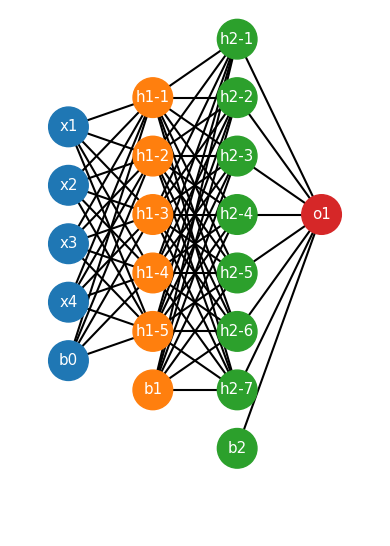

Weights (W[n][m] indicates weight value from node n to node m):

W[b0][h1-1] = 0.7360932716339654
W[x1][h1-1] = -0.031114804799374528
W[x2][h1-1] = 0.4022918363839955
W[x3][h1-1] = 0.7576286338557269
W[x4][h1-1] = 0.6173783775066796

W[b0][h1-2] = 0.5017714941407027
W[x1][h1-2] = 0.5922686094547587
W[x2][h1-2] = 0.6648629946289101
W[x3][h1-2] = 0.015102669104274005
W[x4][h1-2] = 0.021125854578846078

W[b0][h1-3] = -0.12970358561402098
W[x1][h1-3] = -0.6467808915101232
W[x2][h1-3] = 0.38303691391006284
W[x3][h1-3] = -0.600796776232817
W[x4][h1-3] = 0.49702866396006806

W[b0][h1-4] = -0.23986889506360864
W[x1][h1-4] = -0.25593080435112536
W[x2][h1-4] = -0.5877603826481713
W[x3][h1-4] = 0.5434994844644165
W[x4][h1-4] = 0.6429638132493738

W[b0][h1-5] = 0.678005446885302
W[x1][h1-5] = 0.6003112727584442
W[x2][h1-5] = 0.27415455084089
W[x3][h1-5] = -0.11335121133864305
W[x4][h1-5] = -0.03853269044364783


W[b1][h2-1] = -0.44121724593616196
W[h1-1][h2-1] = 0.16826859787135912
W[h1-2][h2-1] =

In [12]:
print(model)

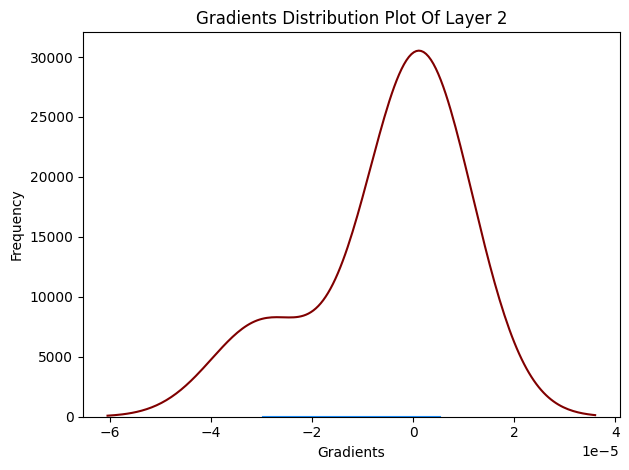

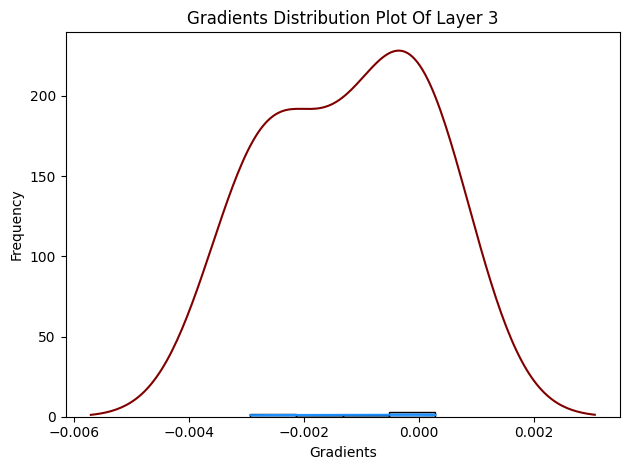

c:\Users\Irfan Sidiq\Documents\uni\smt 6\ml\tugas\IF3270_FFNN\src\layer.py:65: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, color='maroon')


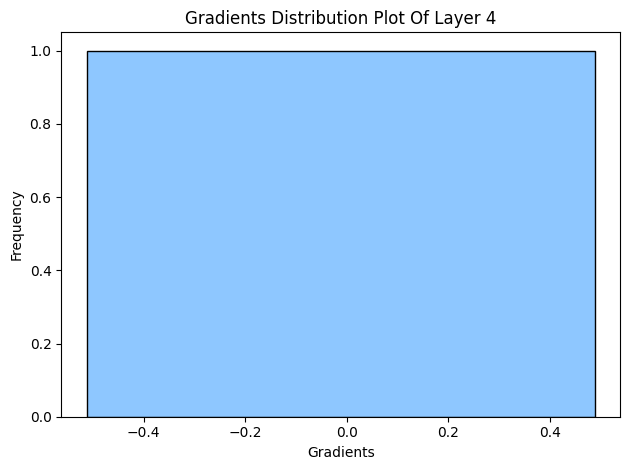

In [13]:
model.plot_gradients([2,3,4])

### **mnist_784 Test Case**

In [14]:
# from sklearn.datasets import fetch_openml

# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [15]:
# # Preprocessing
# X = X / 255.0

# y = y.astype(int)
# num_classes = np.max(y) + 1
# y = np.eye(num_classes)[y]

In [16]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

# print(f"Training set: {X_train.shape}, {y_train.shape}")
# print(f"Validation set: {X_val.shape}, {y_val.shape}")
# print(f"Test set: {X_test.shape}, {y_test.shape}")

In [17]:
# model = FFNN([
#     Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
#     Dense(neuron_size=128, activation="relu", kernel_initializer="glorot_uniform"),
#     Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
# ])

# model.compile(optimizer="sgd", loss="categorical_crossentropy")

# model.fit(X_train[:200], y_train[:200], epochs=20, batch_size=20, verbose=True, validation_data=(X_val[:25], y_val[:25]))
# # res = model.predict(X_train[:5])

# # print(res)

In [18]:
# loss, metric = model.evaluate(X_test[:300], y_test[:300])

In [19]:
# print(model)

In [20]:
# model.plot_weights([1,2,3])